<a href="https://colab.research.google.com/github/Anushka-Raj/Marketing-Campaign-for-Banking-Products/blob/master/1RV18EC023_ANUSHKA_RAJ_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***DSP AND ML ASSIGNMENT***

**NAME: ANUSHKA RAJ**

**USN: 1RV18EC023**

**ECE-A**

**5th SEMESTER**





In [107]:
import pandas as pd
import numpy as np

In [108]:
from google.colab import files
uploaded = files.upload()

Saving IPL IMB381IPL2013.csv to IPL IMB381IPL2013 (3).csv


In [109]:
import io
!pip install -q xlrd
df= pd.read_csv('IPL IMB381IPL2013.csv')


In [110]:
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [111]:
df.tail(10)

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
120,121,"Vettori, DL",2,NZ,DD+,Allrounder,4486,359,2105,81.93,282,45.7,1,121,29,15.13,107.08,2,878,28,31.36,6.81,27.75,2008,250000,625000
121,122,"Vinay Kumar, R",2,IND,RCB+,Bowler,11,1,43,43.87,28,35.3,0,217,25,9.43,104.83,5,1664,61,27.28,8.24,19.87,2011,100000,475000
122,123,"Warne, SK",3,AUS,RR,Bowler,3154,708,1018,72.04,293,36.3,1,198,34,9.90,92.52,6,1447,57,25.39,7.27,20.95,2008,450000,450000
123,124,"Warner, DA",1,AUS,DD,Batsman,483,2,876,85.79,0,0.0,0,1025,109,27.70,135.76,44,0,0,0.00,0.00,0.00,2011,200000,750000
124,125,"White, CL",2,AUS,RCB+,Batsman,146,5,2037,80.48,12,27.5,1,745,78,31.04,132.09,29,70,0,0.00,14.00,0.00,2008,100000,500000
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,0,0.0,0,49,16,9.80,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,3,86.6,1,3,3,3.00,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,109,44.3,1,1237,66,26.32,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,278,35.4,0,99,23,9.90,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000
129,130,"Zoysa, DNT",2,SL,DC,Bowler,288,64,343,95.81,108,39.4,0,11,10,11.00,122.22,0,99,2,49.50,9.00,33.00,2008,100000,110000


In [112]:
df.describe().transpose

<bound method DataFrame.transpose of            Sl.NO.         AGE  ...    BASE PRICE    SOLD PRICE
count  130.000000  130.000000  ...  1.300000e+02  1.300000e+02
mean    65.500000    2.092308  ...  1.922308e+05  5.212231e+05
std     37.671829    0.576627  ...  1.530973e+05  4.068074e+05
min      1.000000    1.000000  ...  2.000000e+04  2.000000e+04
25%     33.250000    2.000000  ...  1.000000e+05  2.250000e+05
50%     65.500000    2.000000  ...  2.000000e+05  4.375000e+05
75%     97.750000    2.000000  ...  2.250000e+05  7.000000e+05
max    130.000000    3.000000  ...  1.350000e+06  1.800000e+06

[8 rows x 22 columns]>

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [114]:
df.shape

(130, 26)

In [115]:
df.dtypes

Sl.NO.             int64
PLAYER NAME       object
AGE                int64
COUNTRY           object
TEAM              object
PLAYING ROLE      object
T-RUNS             int64
T-WKTS             int64
ODI-RUNS-S         int64
ODI-SR-B         float64
ODI-WKTS           int64
ODI-SR-BL        float64
CAPTAINCY EXP      int64
RUNS-S             int64
HS                 int64
AVE              float64
SR-B             float64
SIXERS             int64
RUNS-C             int64
WKTS               int64
AVE-BL           float64
ECON             float64
SR-BL            float64
AUCTION YEAR       int64
BASE PRICE         int64
SOLD PRICE         int64
dtype: object

In [116]:
df[df.isnull()].count()

Sl.NO.           0
PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

In [117]:
X_features = df.columns

In [118]:
X_features = [ 'AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS','RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [119]:
import numpy as np
df['PLAYING ROLE'].unique()
pd.get_dummies(df['PLAYING ROLE'])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [120]:
categorical_features = [ 'AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']
ipl_auction_encoded_df=pd.get_dummies(df[X_features], columns = categorical_features, drop_first = True)
print(ipl_auction_encoded_df[0:5])
ipl_auction_encoded_df.columns

   T-RUNS  T-WKTS  ...  PLAYING ROLE_W. Keeper  CAPTAINCY EXP_1
0       0       0  ...                       0                0
1     214      18  ...                       0                0
2     571      58  ...                       0                0
3     284      31  ...                       0                0
4      63       0  ...                       0                0

[5 rows x 31 columns]


Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [121]:
X_features = ipl_auction_encoded_df.columns

In [122]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = sm.add_constant( ipl_auction_encoded_df )
Y = df['SOLD PRICE']
train_X, test_X, train_y, test_y =  train_test_split(X , Y, train_size = 0.8, random_state = 42 )

In [123]:
ipl_model_1 = sm.OLS(train_y, train_X).fit()
ipl_model_1.summary2()
#print(ipl_model_1.params)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2020-10-03 14:18        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

# **Measures and Tests to Diagnose a MLR model:**

1)Co-efficient of Determination (R-Square) and Adjusted R-Square

2)Hypothesis Test for the Regression Co-efficients (t-Test)

3)Test for Overall Model: Analysis of Variance (F-test)

4)Handling Multi-Collinearity

5)Residual Analysis to validate model assumptions

6)Outlier Analysis

**1. Co-efficient of Determination (R-Square) and Adjusted R-Square:**

In Simple Linear Regression, R-Square is used to measure the proportion of variance in the dependent variable explained by the model. In simple words, it measures how well the model(regression line) fits the data. The co-efficient of determination is defined as


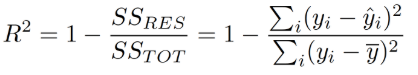

However, R-Square is not a good choice for measuring fitness of MLR due to many independent variables. Because, as no. of independent variables increases, the R-Square will also tend to increase even when there is no significant relationship between dependent and independent variable. In order to overcome this problem, R-square is adjusted by normalizing both SSres and SStot with corresponding degrees of freedom, called adjusted R-Square. The adjusted R-square is defined as



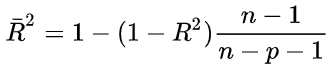


 
where p is no.of explanatory variables in a model.

**Observation:**For our model , the R-square value is 0.554 and the adjusted R-square value is 0.362. This shows that the model explains 36.2% of the variation in dependent variable.

**2. Hypothesis Test for the Regression Co-efficients (t-Test):**

t-test is used to check the existence of statistically significant relationship between the dependent and individual independent variable at a given significance level (α).

The null and alternative hypotheses for the MLR model is given by


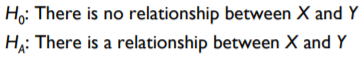

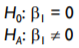

The t-statistic is given by

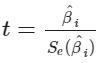


If t-statistic value is higher than the t-critical value at a given significance level α, we reject the null hypothesis. Otherwise, we accept the null hypothesis.

**Observation:** The p-value for the t-test of all the features except HS,AGE_2,AVE and COUNTRY_ENG is below 0.05. This indicates that there is a statistically significant relationship (at significance value of 0.05) between these features and SOLD PRICE (dependent variable).


**3. Test for Overall Model: Analysis of Variance (F-test):**

Analysis of Variance (ANOVA) is used to validate the overall regression model. This means F-test is used to check the statistical significance of the overall model at a given significance level α.

The null and alternative hypothesis for F-test is given by


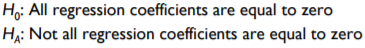


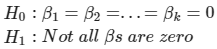


The F-statistic is given by

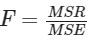


If the p-value for F-statistic value is less than significance level α, we reject the null hypothesis, otherwise we accept null hypothesis.

**Observation:** The probability value of F-statistic of the model is 0.000114(<0.05) which indicates that the overall model is statistically significant.


**4)Multi-Collinearity and Handling Multi-Collinearity**

i)Variance Inflation Factor (VIF)

ii)Heat Map

iii)Pair Plot

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    X_matrix = X.to_numpy()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [125]:
vif_factors = get_vif_factors( X[X_features] )
vif_factors


,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


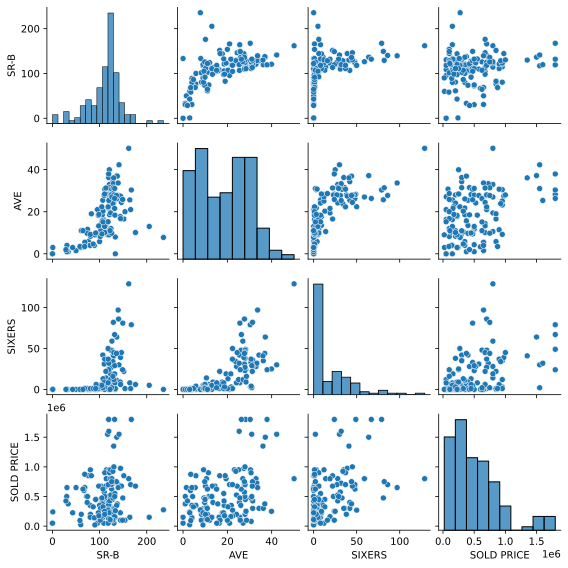

In [126]:
#we will explore the relationship of four variables, SR-B, AVE, SIXERS, SOLD
#PRICE, which we think may be the influential features in determining the SOLD PRICE of batsmen
influential_features = ['SR-B', 'AVE', 'SIXERS', 'SOLD PRICE']
sn.pairplot(df[influential_features], size=2, palette='coolwarm')

Checking Correlation of Columns with Large VIFs

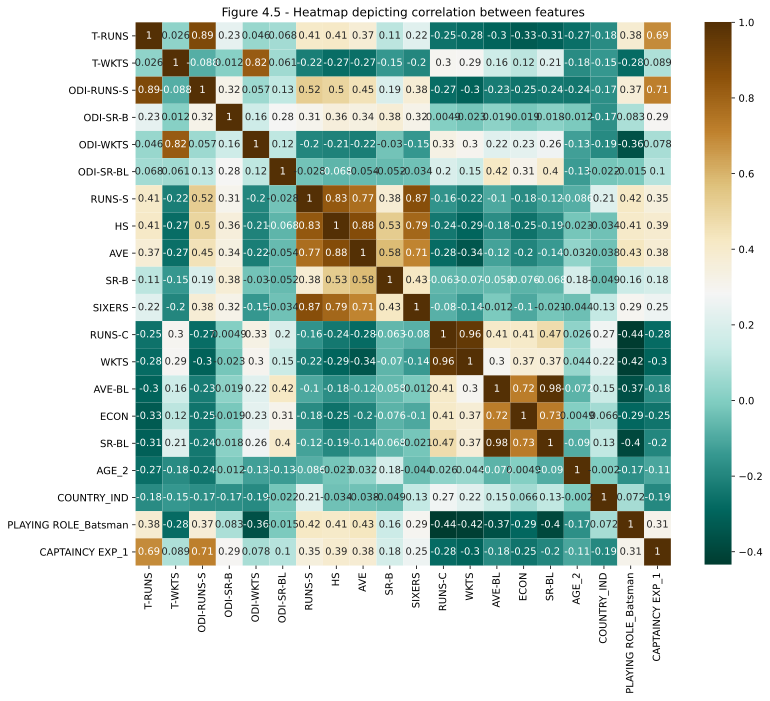

In [127]:
import matplotlib.pyplot as plt 
import seaborn as sn
plt.figure( figsize = (12,10) )
sn.heatmap( X[vif_factors[vif_factors.VIF > 4].column].corr(), annot = True,cmap='BrBG_r' );
plt.title( "Figure 4.5 - Heatmap depicting correlation between features"); 

Removing the feature columns with VIF>4

In [128]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS','AVE', 'RUNS-C', 'SR-B', 'AVE-BL','ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']
X_new_features = list( set(X_features) - set(columns_to_be_removed) ) 
get_vif_factors( X[X_new_features] ) 

,column,VIF
0,COUNTRY_BAN,1.094293
1,COUNTRY_SL,1.519752
2,AGE_3,1.779861
3,COUNTRY_SA,1.416657
4,SIXERS,2.397409
5,CAPTAINCY EXP_1,2.458745
6,COUNTRY_NZ,1.173418
7,PLAYING ROLE_Bowler,3.060168
8,WKTS,2.883101
9,PLAYING ROLE_Batsman,2.680207


Building the model after removing multi-collinearity

In [129]:
train_X = train_X[X_new_features]
ipl_model_2 = sm.OLS(train_y, train_X).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2020-10-03 14:18   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

Let us create a new list called significant_vars to store the column names of significant variables and builda new model

In [130]:
significant_vars = ['COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS', 'CAPTAINCY EXP_1']
train_X = train_X[significant_vars]
ipl_model_3 = sm.OLS(train_y, train_X).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2020-10-03 14:18 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

**5. Residual Analysis to validate model assumptions:**

Residuals or errors are the difference between the actual value of the outcome variable and the predicted value(Y-Yhat). Residual analysis is important for checking model assumptions about normal distribution of residuals, homoscedasticity and the functional form of a regression model.

Check for Normal Distribution of Residuals:

The normality of residuals can be checked using probability-probability plot (P-P plot). P-P plot compares the cumulative distribution function of two distributions against each other. So, we use this plot to check whether the distribution of the residuals matches with that of a normal distribution. Other methods like Q-Q plot and Kolmogorov–Smirnov test are also used for testing normality of distribution.

<Figure size 576x432 with 0 Axes>

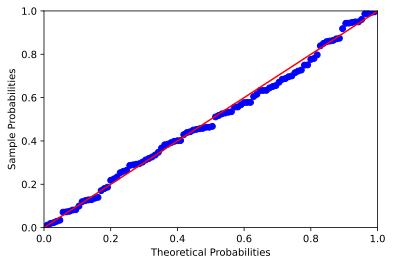

In [131]:
# Test for Normality of Residuals
probplot = sm.ProbPlot(ipl_model_3.resid)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.show()

**Observation:** The residuals follows the approximate normal distribution.

# Test for Homoscedasticity:
An important assumption of the regression model is that the residuals have constant variance (homoscedasticity) across different values of the predicted value (Y).

The homoscedasticity can be observed by drawing a residual plot, a plot between standardized residual value and standardized predicted value.

If there is heteroscedasticity, then funnel type shape in the residual plot can be expected.

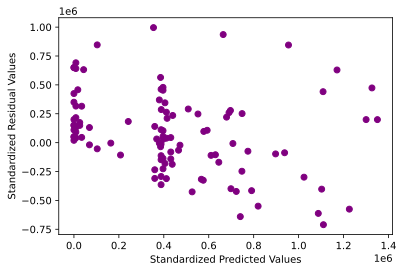

In [132]:
def standardized_values(vals):
    return (vals - vals.mean())/vals.std()
plt.scatter(ipl_model_3.fittedvalues, ipl_model_3.resid,color='purple')
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

**6. Outlier Analysis:**

Outliers can have significant impact on the estimated regression coefficients. The value of regression coefficient may change depending on whether the outliers are present in the data or not. Some of the distance measures are used for diagnosing the outliers and influential observations in MLR model.

Mahalanobis Distance:
Mahalanobis distance is a distance between specific observation and centroid of all observations of the independent variables. It is defined as


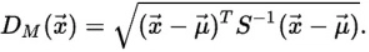


Here, D(x) is mahalanobis distance of point x, μ is mean and inverse of S is covariance matrix.

Any observation with mahalanobis distance value greater than the chi-square critical value (with degrees of freedom equal to no. of features in model), is classified as an outlier.

Cook’s Distance:
It measures how much the predicted value of the dependent variable changes for all the observations in the sample when a particular observation is excluded from sample. Cook’s distance for MLR is defined as


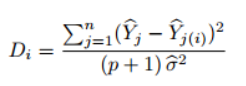


Here, Di is Cook’s distance for i observation, Yj is predicted value of j observation including i observation, Yij is predicted value of j observation excluding i observation, p is no. of features and σ² is mean squared error of regression model.

A cook’s distance of more than 1 indicates highly influential observation. Many authors also recommend a value of 4/(n-p-1) as threshold. Any value above this threshold is classified as influential observation.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


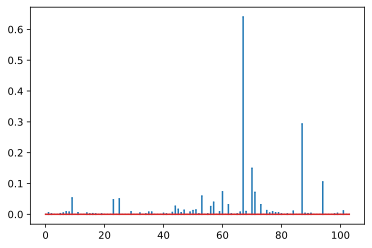

In [133]:
ipl_influence =ipl_model_3.get_influence()
(c, p) = ipl_influence.cooks_distance
plt.stem(np.arange(len(train_X)), np.round(c, 3), markerfmt=',')
plt.show()

**Leverage Value (or Hat Value):**

Leverage value of an observation measures the influence of that observation on the overall fit of the regression function. Leverage value for an observation in MLR is given by


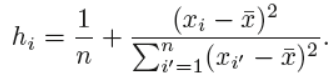


Leverage value of more than 2(p+1)/n or 3(p+1)/n is treated as highly influential observation where p is no. of features in the model.


In [134]:
p = train_X.shape[1]
n = train_X.shape[0]
print( "Number of variables:", p, " and number of observations:", n)
leverage_cutoff = 3*((p + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3))


Number of variables: 4  and number of observations: 104
Cutoff for leverage value:  0.144


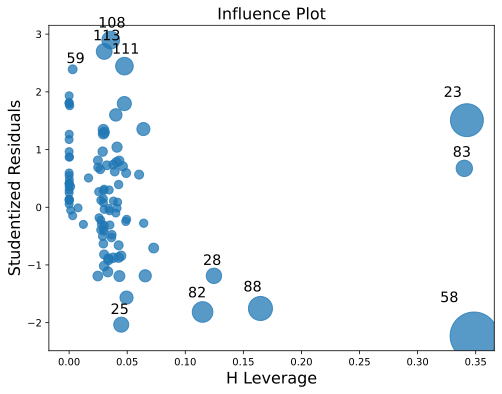

In [135]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(8,6))
influence_plot( ipl_model_3, ax = ax )
plt.show()

In [141]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('1RV18EC023_ANUSHKA_RAJ_1.1.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 163 kB in 2s (93.2 kB/s)
Reading package lists...

'File Download Unsuccessful. Saved in Google Drive'